In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [39]:
import os
print os.getcwd()

/root/workspace/single_human_pose/cocoapi/PythonAPI


In [55]:
dataDir='/root/hdd/dataset/COCO'
dataType='val2017'
annFile='{}/annotations/person_keypoints_val2014_bak_origin.json'.format(dataDir)

In [56]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=3.26s)
creating index...
index created!


In [57]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [60]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
print catIds
imgIds = coco.getImgIds(catIds=catIds );
print len(imgIds)
print imgIds[0]
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print img

[1]
21634
328430
{u'license': 4, u'file_name': u'COCO_val2014_000000574507.jpg', u'coco_url': u'http://mscoco.org/images/574507', u'height': 640, u'width': 413, u'date_captured': u'2013-11-20 12:18:29', u'flickr_url': u'http://farm8.staticflickr.com/7040/6859351695_509c7a94bf_z.jpg', u'id': 574507}


In [59]:
import json
import shutil
from os.path import join

origin_img_path = "/root/hdd/dataset/COCO/images/test2014"
one_person_img_path = "/root/workspace/single_human_pose/dataset/test"

if not os.path.isdir(one_person_img_path):
    os.makedirs(one_person_img_path)

raw_anno = json.load(
    open(annFile, "r")
)

one_person_imgs = []
one_person_annotations = []
for _ in imgIds:
    img = coco.loadImgs(_)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    if len(anns) == 1:
        shutil.copyfile(
            join(origin_img_path, img['file_name']),
            join(one_person_img_path, img['file_name'])
            )
        one_person_imgs.append(img)
        one_person_annotations.append(anns[0])
# pprint(one_person_imgs[0])
# pprint(one_person_annotations[0])
pprint(len(one_person_imgs))

one_person_json_file = {}
one_person_json_file['info'] = raw_anno['info']
one_person_json_file['licenses'] = raw_anno['licenses']
one_person_json_file['categories'] = raw_anno['categories']
one_person_json_file['images'] = one_person_imgs
one_person_json_file['annotations'] = one_person_annotations

json.dump(one_person_json_file, open(join(one_person_img_path, "one_person.json"), "w"))


pprint("Done!")

8584
'Done!'


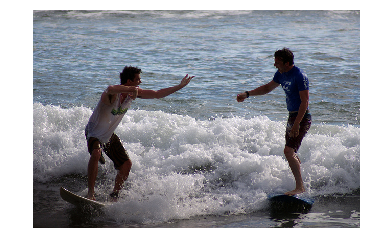

In [33]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# I = io.imread(img['flickr_url'])
from os.path import join
I = io.imread(join(dataDir, "images/train2014", img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

<type 'list'>
2
[575284, 575284]


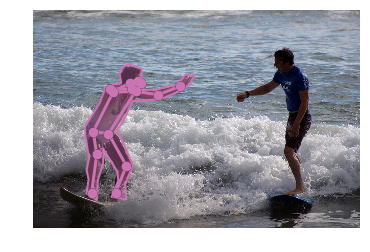

In [36]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print type(anns)
print len(anns)
from pprint import pprint
pprint([_['image_id'] for _ in anns])
coco.showAnns(anns[:1])

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


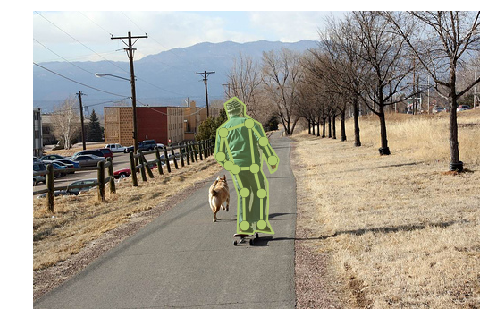

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


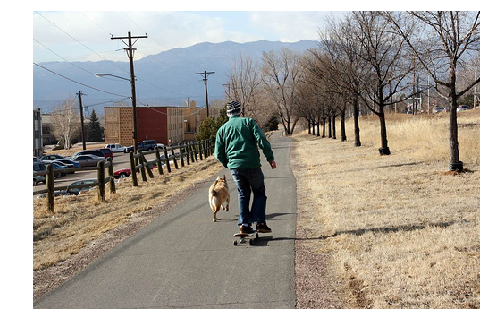

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()